# Spectral weight and self-energy of a hole doped into a CuO$_2$ layer

This notebook can be used to plot the spectral function and the self-energy of a hole doped into a CuO$_2$ layer. The data was calculated with a variational exact diagonalization (VED) algorithm. Here variational means that the Hilbert space is restricted to physically relevant states. Specifically I use translationally invariant basis states with up to $n_m = 2$ magnons. The maximum distance between the magnon and the hole is denoted by $m_c$ and equal to 20. Furthermore a finite broadening of eta = 0.1 is introduced.

Assuming that $U_{dd} \rightarrow \infty$, we can treat the Cu-ions as spin degrees of freedom which order antiferromagnetically (AFM). For the magnetic unit cell we choose the following convention

<img src="./UnitCell.svg" />

where the labelled sites are part of the unit cell.

The Hamiltonian is given by:

$H = T_{pp} + T_{pp}' + T_{\mathrm{swap}} + H_{J_{pd}} + H_{J_{dd}}$.

Here $T_{pp}$ is nearest neighbor (NN) and $T_{pp}'$ is next nearest neighbor (NNN) hopping for the hole which is hosted by the oxygen sublattice. $T_{\mathrm{swap}}$ is hopping with a potential swapping of the hole-spin with that of a neighboring Cu-ion. This term was first introduced by Lau et al in PRL **106**, 036401 (2011). $H_{J_{pd}}$ is a Heisenberg exchange interaction between the oxygen hole and the neighboring Cu-spins. The exchange interaction between neighboring Cu-spins, $H_{J_{dd}}$ is for simplicity treated as an Ising interaction. This was shown to give good results because the magnons move at a much slower speed than the hole (see Ebrahimnejad et al, Nature Physics **10**, 951-955 (2014)). In units of $J_{dd} = 120-160 \mathrm{meV}$ the coupling constants are:
$t_{pp} = 4.13$, 
$t_{pp}' = 2.90$, 
$t_{\mathrm{swap}} = 2.98$, 
$J_{pd} = 2.83$.

The self-energy $\Sigma(\mathbf{k}.\omega)$ and spectral weight $A(\mathbf{k}.\omega)$ are related to the Greens function $G(\mathbf{k}.\omega)$ via 

$$
\Sigma(\mathbf{k}.\omega) =  \omega + i \eta - H_{0} - G^{-1}(\mathbf{k}.\omega),
$$
$$
A(\mathbf{k}.\omega) = - \mathrm{Im}G(\mathbf{k}.\omega) / \pi .
$$

For $H_0$ I choose $H_0 = T_{pp} + T_{pp}' + H_{J_{dd}}$. Note that since the magnons are assumed to be of Ising-type $H_{J_{dd}}$ only has diagonal elements.

The data is stored in files with names such as "self_energy_nm_2_mc_20_eta_0.10_imag_x1x1.dat" . The parameters $n_m$, $m_c$ and eta are part of the filename. Furthermore the projection, in this case $x_1x_1$, is part of the filename. For the self-energy the imaginary (imag) and real part is stored in separate files. The files for the spectral function are prefixed with "spwt_". Each file contains the self-energy/spectral function for a range of frequencies $\omega$ along the Brillouin Zone cut going from $Y \rightarrow \Gamma \rightarrow M \rightarrow Y \rightarrow X$. Each segment of this cut was divided into 80 k-points. Each line of the files contains the self-energy/spectral function at a given k-point, but for different frequencies $\omega$. The frequency values are stored in the file "omega_nm_2_mc_20_eta_0.10.dat" and the momentum values are stored in the file "kxky_nm_2_mc_20_eta_0.10.dat" .

## Location of the continua
Continua in the spectral weight correspond to states of a QP and a free magnon. They span the energy range $[\mathrm{min}_{\mathbf{q}}\epsilon(\mathbf{q}) + 2 J_{dd}, \mathrm{max}_{\mathbf{q}}\epsilon(\mathbf{q}) + 2 J_{dd}]$, where $\epsilon(\mathbf{q})$ is the QP dispersion and $2 J_{dd}$ is the energy cost of a magnon. However, since we are only allowing up to two magnons we are not guaranteed to find the continua at the right energies. The reason for this is that when there is one free magnon in the system, the QP can only bind up to one magnon which is not sufficient for convergence. To better investigate this effect I also provide data for $n_m = 1$.

## A note on the numerics

One can use the Lanczos method to calculate $G(\mathbf{k}.\omega)$. This works well for the spectral function, but when calculating the self-energy one needs to invert $G^(\mathbf{k}.\omega)$ and small numerical errors or ghost states may have a large effect on the inverse.

It is also possible to calculate the Green's function by solving a linear system of equations:

$$
(\omega + i \eta - H) G(\mathbf{k}.\omega) = \left (\begin{array}{c}
1 & 0 & 0 & 0  \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots 
\end{array} \right ).
$$

This is how the data used in this notebook was obtained. In the future I may compare these results to results obtained with the Lanczos algorithm which has the advantage that it is significantly faster.

Since this is an ongoing project I cannot make the code which was used to generate the data public. If you are interested in obtaining the code please feel free to contact me.

In [1]:
# import statements
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define a function for plotting the data

plt.rc('text', usetex=True)
plt.rc('font', size=16)

def plot_contour(data,w_vals,vmin=None, vmax=None):
    ''' Make a contour plot.
    
    Parameters
    ----------
    data: numpy array containt the values for a spectral function 
        or self-energy function. Shape is (num_omega_values,num_k_values)
    w_vals: .dat file containing the values of omega associated with the data.
    vmin: lower limit for the color map. None defaults to the smallest value of data.
    vmax: upper limit for the color map. None defaults to the largets value of data.
    '''
    if vmin == None:
        vmin = np.amin(data)
    if vmax == None:
        vmax = np.amax(data)

    wmin = w_vals[0]
    wmax = w_vals[-1]
    cmap=plt.cm.seismic
    plt.imshow(data,\
               cmap=cmap,\
               origin='lower',\
               extent=(0,320,wmin,wmax),\
               interpolation='none',\
               aspect='auto',\
               vmin=vmin,\
               vmax=vmax)
    plt.xlabel(r'$\mathbf{k}$')
    plt.ylabel(r'$\omega$')
    plt.xticks([0,80,160,240,320],['Y',r'$\Gamma$','M','Y','X'])
    plt.colorbar()
    plt.tight_layout()

In [3]:
# In this cell the data is loaded into numpy arrays
proj = 'x1x1' # project on the x1-orbital. Change this line for a different projection.

spwt_unpert = np.genfromtxt('./data/spwt_unperturbed_eta_0.10_'+proj+'.dat').T
spwt_nm_2 = np.genfromtxt('./data/spwt_nm_2_mc_20_eta_0.10_'+proj+'.dat').T
spwt_nm_1 = np.genfromtxt('./data/spwt_nm_1_mc_20_eta_0.10_'+proj+'.dat').T
self_energy_nm_2_imag = np.genfromtxt('./data/self_energy_nm_2_mc_20_eta_0.10_imag_'+proj+'.dat').T
self_energy_nm_2_real = np.genfromtxt('./data/self_energy_nm_2_mc_20_eta_0.10_real_'+proj+'.dat').T
w_vals = np.genfromtxt('./data/omega_nm_2_mc_20_eta_0.10.dat') # the same for all the data except the unpertubed
w_vals_unpert = np.genfromtxt('./data/omega_unperturbed_eta_0.10.dat')
k_vals = np.genfromtxt('./data/kxky_nm_2_mc_20_eta_0.10.dat') # the same for all the data
print spwt_nm_2.shape
print spwt_unpert.shape

(1280, 321)
(1600, 321)


## Contour plots of the spectral weight (using log-scale)

I use a log-scale so that small features in the spectral function can also be seen. I als tried using a hyperbolic tangens to rescale the data, but it does not work as well. The diagonal elements of $A(\mathbf{k},\omega)$ are always larger than 0, that is why the log-scale works. Note furthemore that the plots below change when a different projection is used. In particular, for the unperturbed Green's function not all the bands are necessarily visible.

<IPython.core.display.Javascript object>


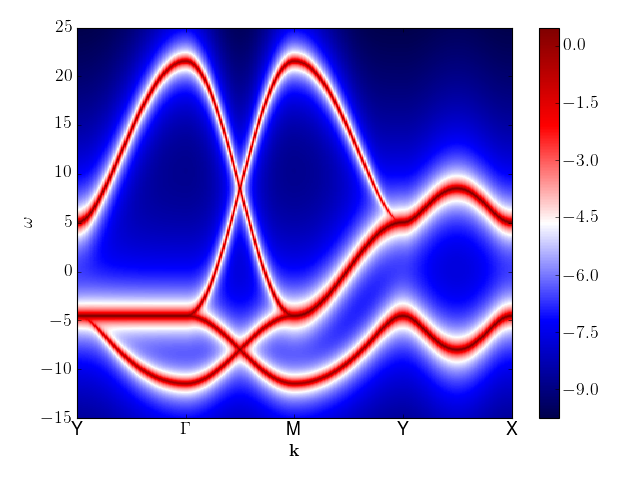

<IPython.core.display.Javascript object>


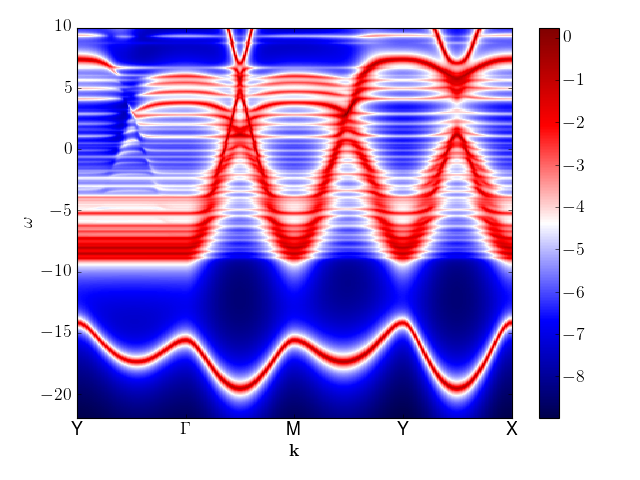

<IPython.core.display.Javascript object>


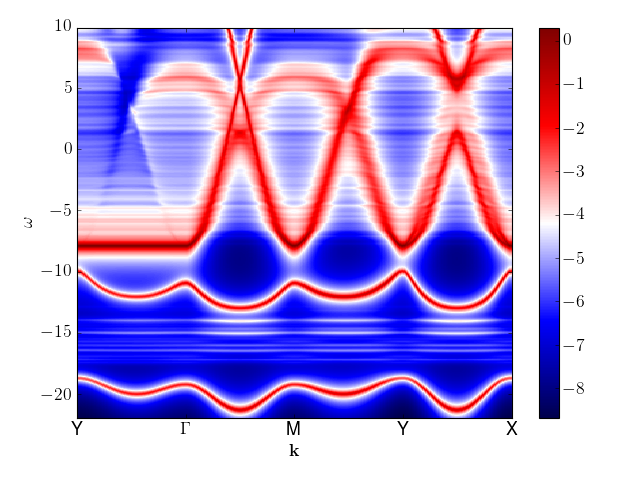

In [4]:
plt.figure('Spectral weight contour (unperturbed)')
plot_contour(np.log(spwt_unpert),w_vals_unpert)
plt.figure('Spectral weight contour n_m = 1')
plot_contour(np.log(spwt_nm_1),w_vals)
plt.figure('Spectral weight contour n_m = 2')
plot_contour(np.log(spwt_nm_2),w_vals)

## Contour plots of the self-energy

Note that since the magnons are dispersionless the continuum edges are independent of $\mathbf{k}$. That is why the features of the self-energy appear as flat lines in the contour plot.

I am using a symmetric scale for the color bar (vmin=vmax) so that 0 corresponds to white. Note that when projecting on a diagonal entry of the self-energy one expects that the imaginary part is always smaller than 0.

<IPython.core.display.Javascript object>


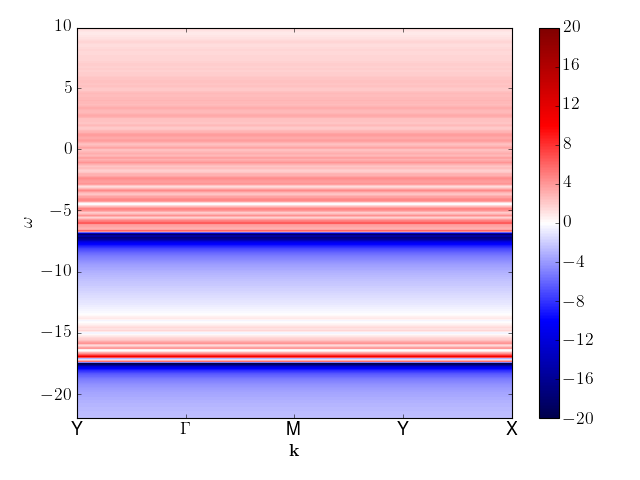

<IPython.core.display.Javascript object>


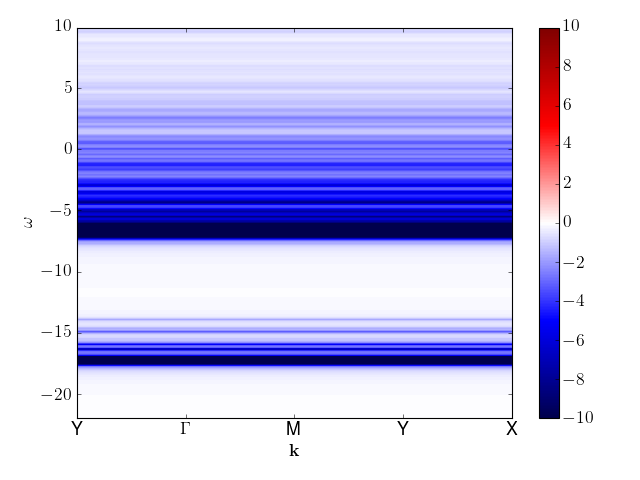

In [5]:
plt.figure('self-energy real part contour n_m =2')
plot_contour(self_energy_nm_2_real,w_vals,vmin=-20,vmax=20)

plt.figure('self-energy imaginary part contour n_m =2')
plot_contour(self_energy_nm_2_imag,w_vals,vmin=-10,vmax=10)

## Self-energy cuts
To see more structure in the self-energy one can look at cuts for a single $\mathbf{k}$-value.

Note that the spiky structure of the self-energy is due to the finite value of $m_c$. Furthermore the onset of the first continuum coincides with the QP peak from the $n_m=1$ spectral function shifted by $2 J_{dd}$. Note that I rescaled the spectral function to make it easier to see.

(kx, ky) = ([0.5 0.5]) in units of pi


<IPython.core.display.Javascript object>


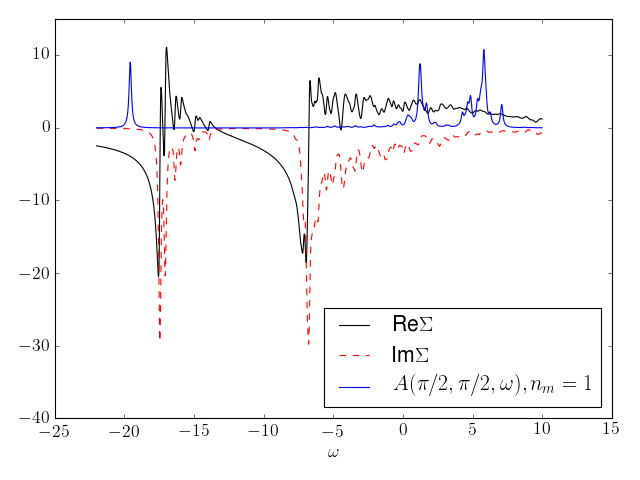

In [6]:
# Choose where to make the cut (change the line below for a different cut
cut_index = 120
# This corresponds to momentum of (in units of pi)
print '(kx, ky) = ({:}) in units of pi'.format(k_vals[cut_index]/np.pi)

plt.figure('self-energy cut')
plt.plot(w_vals,self_energy_nm_2_real[:,cut_index],'-k',label=r'Re$\Sigma$')
plt.plot(w_vals,self_energy_nm_2_imag[:,cut_index],'--r',label=r'Im$\Sigma$')
plt.plot(w_vals,spwt_nm_1[:,120]*20,'-b',label=r'$A(\pi/2,\pi/2,\omega), n_m=1$')
# plt.plot(w_vals,spwt_nm_1[:,cut_index]*10,'-b',label='spwt n_m = 1')
plt.xlim([-25,15])
plt.ylim([-40,15])
plt.xlabel(r'$\omega$')
plt.ylabel('')
plt.tight_layout()
plt.legend(loc=0)